Here, we will be using Decision Trees and Random Forest models on the House Price Prediction dataset. We will go through the following steps:

1. Download and prepare the dataset for training
2. Train, evaluate and interpret a decision tree
3. Train, evaluate and interpret a random forest
4. Tune hyperparameters to improve the model
5. Make predictions and save the model

In [2]:
import os
from zipfile import ZipFile
from urllib.request import urlretrieve

dataset_url = 'https://github.com/JovianML/opendatasets/raw/master/data/house-prices-advanced-regression-techniques.zip'
urlretrieve(dataset_url, 'house-prices.zip')

with ZipFile('house-prices.zip') as f:
    f.extractall(path='house-prices')
    
os.listdir('house-prices')

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

In [6]:
import pandas as pd
raw_df = pd.read_csv('house-prices/train.csv')

In [7]:
raw_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [8]:
raw_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Pre-processing

In [11]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [33]:
# Creating input and target dataframes 
input_df = raw_df[raw_df.columns[1:-1]].copy()
target_df = raw_df['SalePrice'].copy()

# Separating numeric and categorical columns
numeric_cols = input_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = input_df.select_dtypes(include='object').columns.tolist()

# Imputing missing values
imputer = SimpleImputer(strategy='mean')
imputer.fit(input_df[numeric_cols])
input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])

# Scaling values
scaler = MinMaxScaler()
scaler.fit(input_df[numeric_cols])
input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])

# One Hot Encoding values
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(input_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])

C:\Users\Asus\AppData\Local\Temp\ipykernel_31620\4279142834.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
C:\Users\Asus\AppData\Local\Temp\ipykernel_31620\4279142834.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
C:\Users\Asus\AppData\Local\Temp\ipykernel_31620\4279142834.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.i

In [35]:
# Creating training and validation sets
train_inputs, val_inputs, train_targets, val_targets = train_test_split(input_df[numeric_cols+encoded_cols], target_df, test_size=0.25, random_state=42)

### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
tree = DecisionTreeRegressor(random_state=42)

In [38]:
tree.fit(train_inputs, train_targets)

DecisionTreeRegressor(random_state=42)

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
tree_train_preds = tree.predict(train_inputs)

In [41]:
tree_train_rmse = mean_squared_error(tree_train_preds, train_targets)

In [42]:
tree_val_preds = tree.predict(val_inputs)

In [43]:
tree_val_rmse = mean_squared_error(tree_val_preds, val_targets)

In [44]:
print('Train RMSE: {}, Validation RMSE: {}'.format(tree_train_rmse, tree_val_rmse))

Train RMSE: 0.0, Validation RMSE: 1429057134.4054794


In [46]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
import seaborn as sns

sns.set_style('darkgrid')

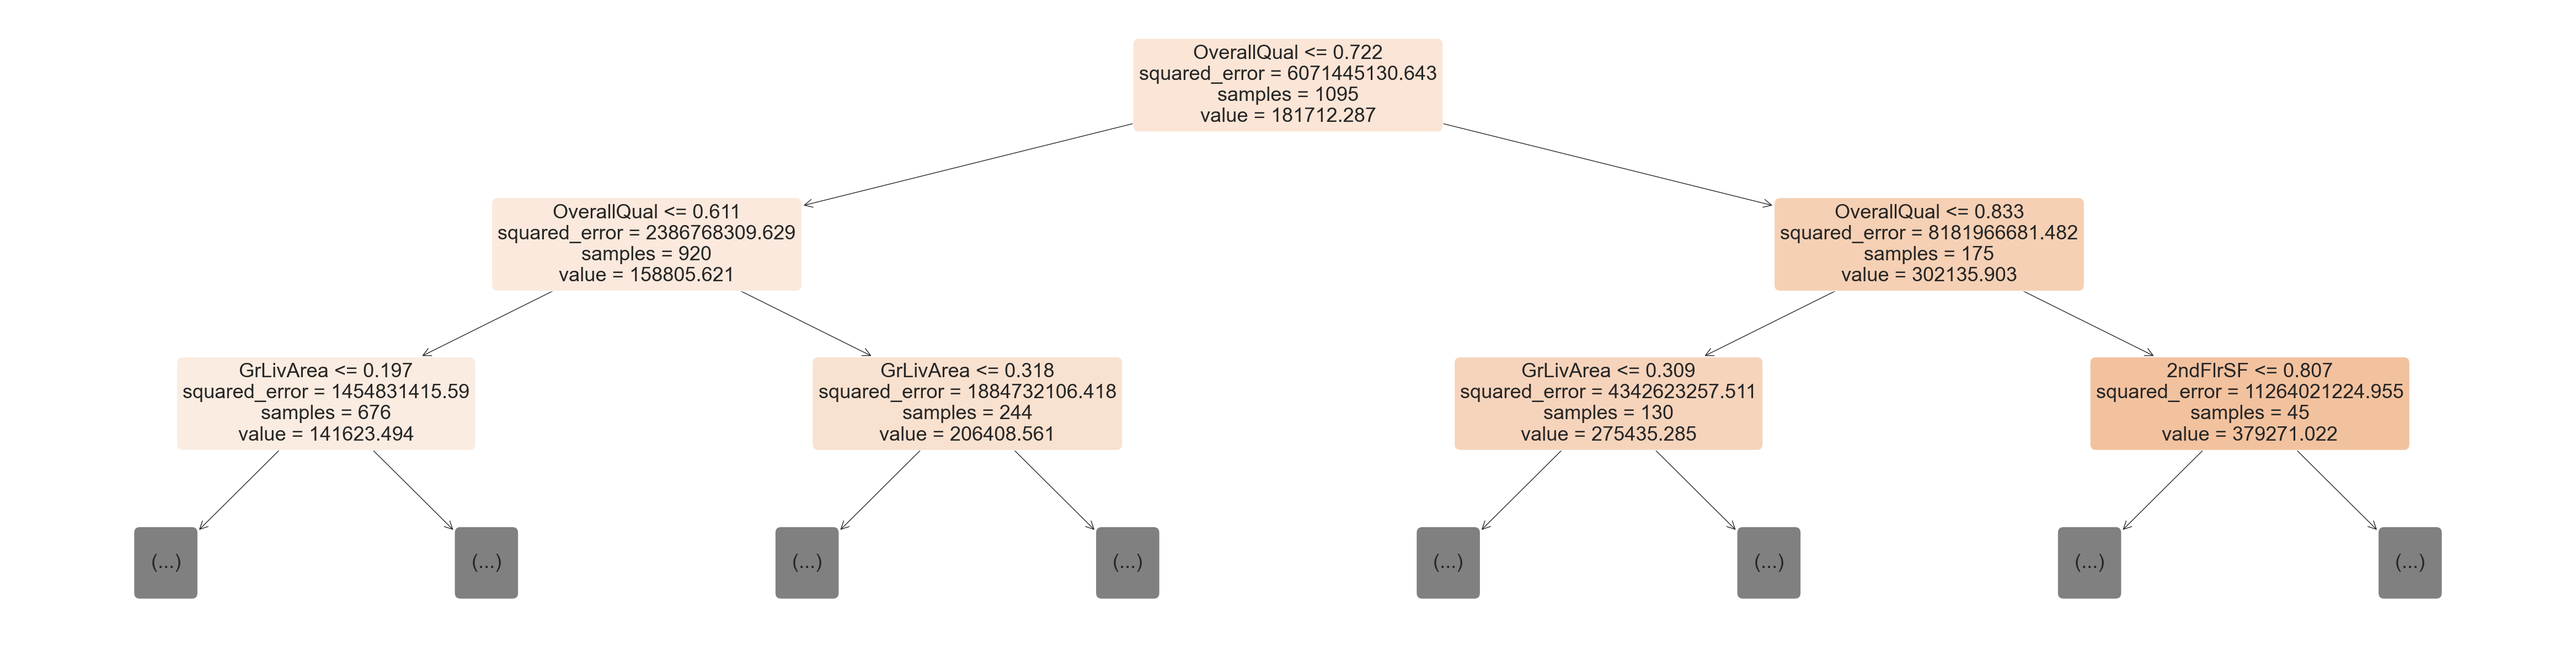

In [59]:
plt.figure(figsize=(60,15))

plot_tree(tree, feature_names=train_inputs.columns ,max_depth=2 ,filled=True ,rounded=True);

In [64]:
tree_text = export_text(tree, feature_names=list(train_inputs.columns))
print(tree_text[:3000])

|--- OverallQual <= 0.72
|   |--- OverallQual <= 0.61
|   |   |--- GrLivArea <= 0.20
|   |   |   |--- TotalBsmtSF <= 0.16
|   |   |   |   |--- OverallQual <= 0.39
|   |   |   |   |   |--- GarageCond_TA <= 0.50
|   |   |   |   |   |   |--- LotArea <= 0.04
|   |   |   |   |   |   |   |--- CentralAir_Y <= 0.50
|   |   |   |   |   |   |   |   |--- YearBuilt <= 0.54
|   |   |   |   |   |   |   |   |   |--- SaleCondition_Abnorml <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Neighborhood_BrkSide <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- Neighborhood_BrkSide >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [39300.00]
|   |   |   |   |   |   |   |   |   |--- SaleCondition_Abnorml >  0.50
|   |   |   |   |   |   |   |   |   |   |--- 2ndFlrSF <= 0.09
|   |   |   |   |   |   |   |   |   |   |   |--- value: [34900.00]
|   |   |   |   |   |   |   |   |   |   |--- 2ndFlrSF >  0.09
|   |   |  

In [66]:
tree_importances = tree.feature_importances_

In [70]:
tree_importances_df = pd.DataFrame({
    'features':train_inputs.columns,
    'importance':tree_importances
}).sort_values('importance',ascending=False)

In [71]:
tree_importances_df.head(10)

,features,importance
3,OverallQual,0.632537
15,GrLivArea,0.104334
13,2ndFlrSF,0.031896
11,TotalBsmtSF,0.028504
12,1stFlrSF,0.026730
8,BsmtFinSF1,0.025080
1,LotFrontage,0.022783
26,GarageArea,0.010916
34,MoSold,0.008454
24,GarageYrBlt,0.008085


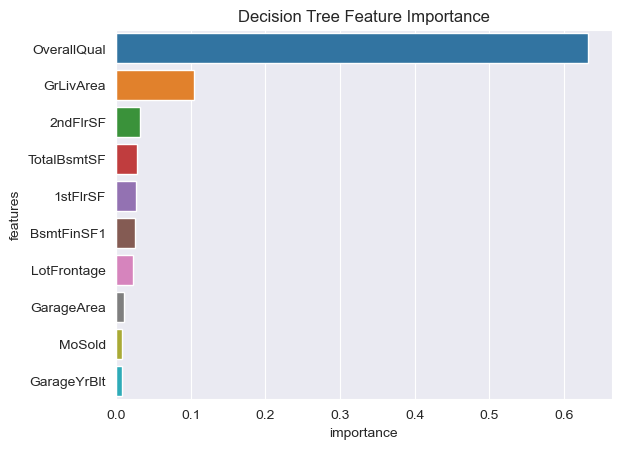

In [81]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=tree_importances_df.head(10), x='importance', y='features');

We can clearly observe that the feature OverallQual is having very much importance and hence the data is skewed when being used with Decision Tree

### Random Forest

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
rf1 = RandomForestRegressor(random_state=42, n_jobs=-1)

In [84]:
rf1.fit(train_inputs, train_targets)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [85]:
rf1_train_preds = rf1.predict(train_inputs)

In [86]:
rf1_train_rmse = mean_squared_error(rf1_train_preds, train_targets)

In [87]:
rf1_val_preds = rf1.predict(val_inputs)
rf1_val_rmse = mean_squared_error(rf1_val_preds, val_targets)

In [88]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf1_train_rmse, rf1_val_rmse))

Train RMSE: 140762048.72081444, Validation RMSE: 774511050.5034367


#### Hyperparameter Tuning

In [90]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

In [91]:
test_params(n_estimators=20, max_depth=20)

(13776.89957127333, 28886.033523273858)

In [92]:
test_params(n_estimators=50, max_depth=10, min_samples_leaf=4, max_features=0.4)

(20490.359632429263, 29804.931642791602)

In [93]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

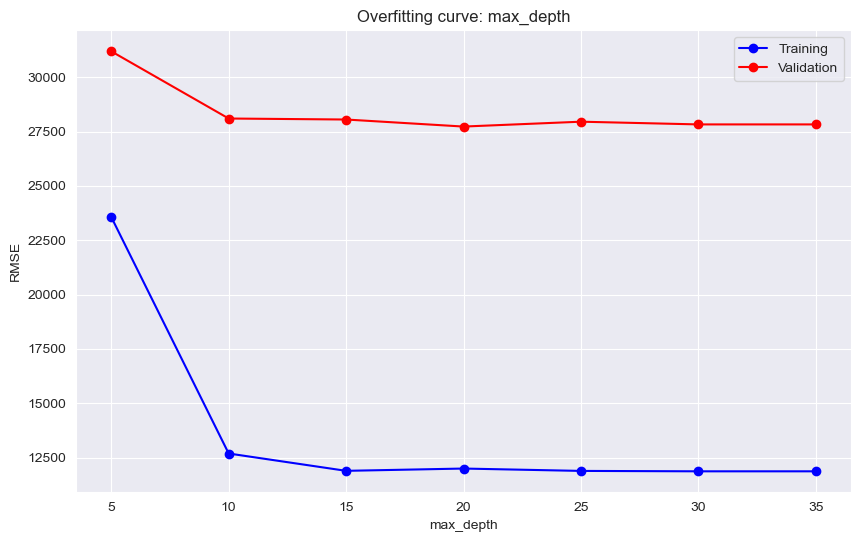

In [94]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

### Making predictions on test set

In [95]:
test_df = pd.read_csv('house-prices/test.csv')

In [96]:
test_df[numeric_cols] = imputer.transform(test_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])
test_df[encoded_cols] = encoder.transform(test_df[categorical_cols])

C:\Users\Asus\AppData\Local\Temp\ipykernel_31620\1246653823.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[encoded_cols] = encoder.transform(test_df[categorical_cols])
C:\Users\Asus\AppData\Local\Temp\ipykernel_31620\1246653823.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[encoded_cols] = encoder.transform(test_df[categorical_cols])
C:\Users\Asus\AppData\Local\Temp\ipykernel_31620\1246653823.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` 

In [97]:
test_inputs = test_df[numeric_cols + encoded_cols]

In [99]:
test_preds = rf1.predict(test_inputs)

In [100]:
submission_df = pd.read_csv('house-prices/sample_submission.csv')

In [101]:
submission_df

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [102]:
submission_df['SalePrice'] = test_preds

In [103]:
submission_df.to_csv('submission.csv', index=False)

In [104]:
from IPython.display import FileLink
FileLink('submission.csv') # Doesn't work on Colab, use the file browser instead to download the file.

C:\Users\Asus\PyTorch\Machine Learning Jovian\Machine-Learning-basics\submission.csv

### Making predictions on single inputs

In [105]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols].values)
    return model.predict(input_df[numeric_cols + encoded_cols])[0]

In [106]:
sample_input = { 'MSSubClass': 20, 'MSZoning': 'RL', 'LotFrontage': 77.0, 'LotArea': 9320,
 'Street': 'Pave', 'Alley': None, 'LotShape': 'IR1', 'LandContour': 'Lvl', 'Utilities': 'AllPub',
 'LotConfig': 'Inside', 'LandSlope': 'Gtl', 'Neighborhood': 'NAmes', 'Condition1': 'Norm', 'Condition2': 'Norm',
 'BldgType': '1Fam', 'HouseStyle': '1Story', 'OverallQual': 4, 'OverallCond': 5, 'YearBuilt': 1959,
 'YearRemodAdd': 1959, 'RoofStyle': 'Gable', 'RoofMatl': 'CompShg', 'Exterior1st': 'Plywood',
 'Exterior2nd': 'Plywood', 'MasVnrType': 'None','MasVnrArea': 0.0,'ExterQual': 'TA','ExterCond': 'TA',
 'Foundation': 'CBlock','BsmtQual': 'TA','BsmtCond': 'TA','BsmtExposure': 'No','BsmtFinType1': 'ALQ',
 'BsmtFinSF1': 569,'BsmtFinType2': 'Unf','BsmtFinSF2': 0,'BsmtUnfSF': 381,
 'TotalBsmtSF': 950,'Heating': 'GasA','HeatingQC': 'Fa','CentralAir': 'Y','Electrical': 'SBrkr', '1stFlrSF': 1225,
 '2ndFlrSF': 0, 'LowQualFinSF': 0, 'GrLivArea': 1225, 'BsmtFullBath': 1, 'BsmtHalfBath': 0, 'FullBath': 1,
 'HalfBath': 1, 'BedroomAbvGr': 3, 'KitchenAbvGr': 1,'KitchenQual': 'TA','TotRmsAbvGrd': 6,'Functional': 'Typ',
 'Fireplaces': 0,'FireplaceQu': np.nan,'GarageType': np.nan,'GarageYrBlt': np.nan,'GarageFinish': np.nan,'GarageCars': 0,
 'GarageArea': 0,'GarageQual': np.nan,'GarageCond': np.nan,'PavedDrive': 'Y', 'WoodDeckSF': 352, 'OpenPorchSF': 0,
 'EnclosedPorch': 0,'3SsnPorch': 0, 'ScreenPorch': 0, 'PoolArea': 0, 'PoolQC': np.nan, 'Fence': np.nan, 'MiscFeature': 'Shed',
 'MiscVal': 400, 'MoSold': 1, 'YrSold': 2010, 'SaleType': 'WD', 'SaleCondition': 'Normal'}

In [107]:
predicted_price = predict_input(rf1, sample_input)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\Asus\AppData\Local\Temp\ipykernel_31620\2739346821.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols].values)
C:\Users\Asus\AppData\Local\Temp\ipykernel_31620\2739346821.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  input_df[encoded_cols] = encoder.transform(input_df[ca

In [108]:
print('The predicted sale price of the house is ${}'.format(predicted_price))

The predicted sale price of the house is $123408.5
